<a href="https://colab.research.google.com/github/jahnavi-077/mnist-models-comparison/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten ,BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Model 1: Relu + Adam**

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=100,
    validation_split=0.2
)


Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8535 - loss: 0.4878 - val_accuracy: 0.9661 - val_loss: 0.1166
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9577 - loss: 0.1418 - val_accuracy: 0.9712 - val_loss: 0.0944
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9679 - loss: 0.1030 - val_accuracy: 0.9726 - val_loss: 0.0880
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9741 - loss: 0.0828 - val_accuracy: 0.9768 - val_loss: 0.0792
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9781 - loss: 0.0688 - val_accuracy: 0.9774 - val_loss: 0.0746
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9809 - loss: 0.0592 - val_accuracy: 0.9782 - val_loss: 0.0768
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9825 - loss: 0.0508 - val_accuracy: 0.9809 - val_loss: 0.0675
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9842 - loss: 0.0491 - val_ac

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0815
Test Accuracy: 0.9831


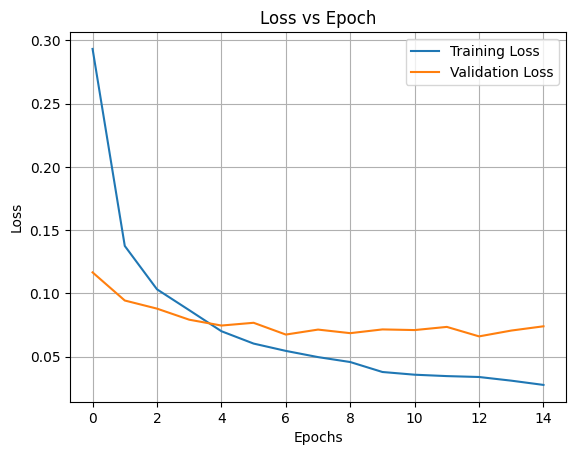

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
predictions = model.predict(X_test)

# Predict the digit for the first image
predicted_digit = np.argmax(predictions[0])
print("Predicted Digit:", predicted_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Digit: 7


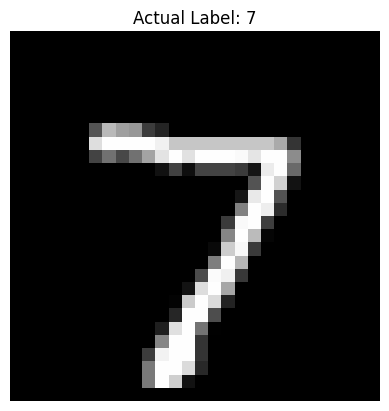

Predicted Label: 7


In [15]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Actual Label: {np.argmax(y_test[0])}")
plt.axis('off')
plt.show()

print("Predicted Label:", np.argmax(predictions[0]))


**Model 2 : Relu + SGD**

In [16]:
model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=100,
    validation_split=0.2
)


Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9825 - val_loss: 0.0700
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9917 - loss: 0.0228 - val_accuracy: 0.9822 - val_loss: 0.0700
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9822 - val_loss: 0.0697
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9823 - val_loss: 0.0698
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9821 - val_loss: 0.0694
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9824 - val_loss: 0.0692
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9920 - loss: 0.0231 - val_accuracy: 0.9824 - val_loss: 0.0692
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9931 - loss: 0.0207 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0750
Test Accuracy: 0.9839


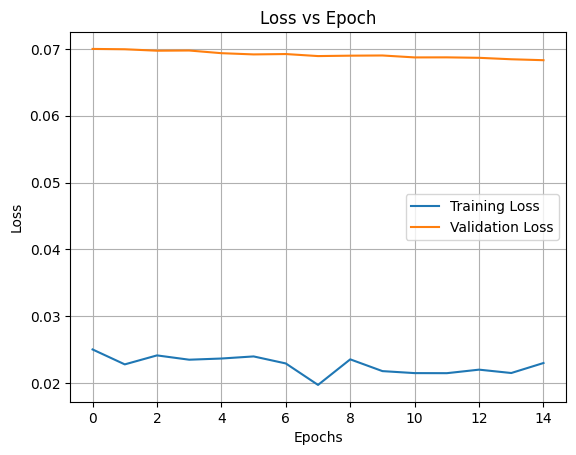

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


**Model 3 : Sigmoid + Adam**

In [20]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer

    Dense(512),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=100,
    validation_split=0.2
)


Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7584 - loss: 0.9312 - val_accuracy: 0.9133 - val_loss: 0.3142
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8886 - loss: 0.3926 - val_accuracy: 0.9277 - val_loss: 0.2513
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9061 - loss: 0.3228 - val_accuracy: 0.9397 - val_loss: 0.2125
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9190 - loss: 0.2731 - val_accuracy: 0.9463 - val_loss: 0.1889
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9274 - loss: 0.2396 - val_accuracy: 0.9536 - val_loss: 0.1659
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9405 - loss: 0.2006 - val_accuracy: 0.9592 - val_loss: 0.1407
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9460 - loss: 0.1774 - val_accuracy: 0.9618 - val_loss: 0.1351
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9527 - loss: 0.1543 - val_ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0902
Test Accuracy: 0.9754


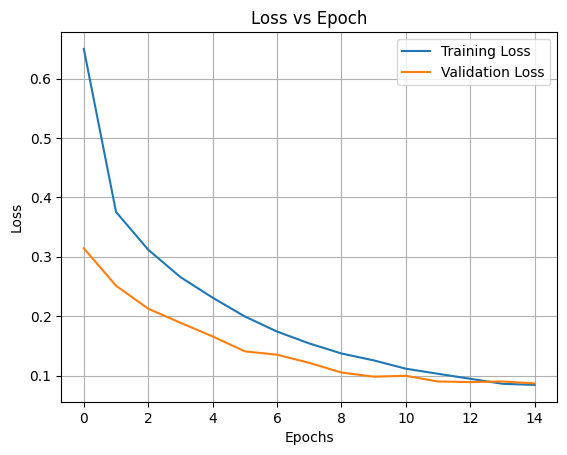

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

**Model 4 : Sigmoid + SGD**

In [25]:
model.compile(
    optimizer=SGD(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=100,
    validation_split=0.2
)

Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9773 - loss: 0.0697 - val_accuracy: 0.9778 - val_loss: 0.0793
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9778 - val_loss: 0.0794
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9791 - loss: 0.0659 - val_accuracy: 0.9779 - val_loss: 0.0794
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9802 - loss: 0.0663 - val_accuracy: 0.9781 - val_loss: 0.0793
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9791 - loss: 0.0658 - val_accuracy: 0.9781 - val_loss: 0.0791
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9792 - loss: 0.0657 - val_accuracy: 0.9779 - val_loss: 0.0791
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9793 - loss: 0.0661 - val_accuracy: 0.9776 - val_loss: 0.0792
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9791 - loss: 0.0653 - val_accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0836
Test Accuracy: 0.9772


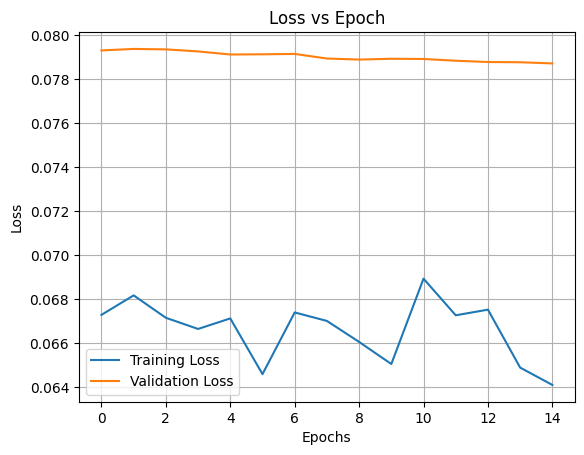

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()